# 📊 Kaggle Survey Insights (2017–2021)
This notebook analyzes the Kaggle Data Science & Machine Learning Survey (2017–2021). We will clean the dataset, encode categorical variables, and extract **Top 5 insights** about respondent behavior.

## Step 1: Load Dataset

In [1]:
import pandas as pd
import sklearn as sk

# Load survey data (example: 2021)
df = pd.read_csv("data/kaggle_survey_2017_2021.csv", low_memory=False)

# Drop metadata row (first row)
df = df.iloc[1:].reset_index(drop=True)

print(df.shape)
df.head()

(106301, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Data Cleaning

In [2]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with more than 50% missing values
df = df.dropna(thresh=len(df.columns)//2)

# Normalize text in 'Q3' (Country)
df['Q3'] = df['Q3'].astype(str).str.strip().str.title()

print("Remaining rows:", df.shape[0])

Remaining rows: 15


## Step 3: Encode / Map Categorical Variables

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode gender (Q2)
encoder = LabelEncoder()
df['Q2_encoded'] = encoder.fit_transform(df['Q2'].astype(str))

# Map education (Q4)
education_map = {
    "Doctoral degree": 5,
    "Master’s degree": 4,
    "Bachelor’s degree": 3,
    "Some college/university study without earning a bachelor’s degree": 2,
    "No formal education past high school": 1
}
df['Education_Level'] = df['Q4'].map(education_map)
df[['Q2','Q2_encoded','Q4','Education_Level']].head()

,Q2,Q2_encoded,Q4,Education_Level
658,Man,0,Some college/university study without earning ...,NaN
1281,Man,0,Masterâ€™s degree,NaN
3997,Man,0,Bachelorâ€™s degree,NaN
5110,Man,0,Bachelorâ€™s degree,NaN
14365,Man,0,Masterâ€™s degree,NaN


## Step 4: Extract Insights

In [4]:
# 1. Top programming languages (Q7 multiple choice)
top_langs = df['Q7_Part_1'].value_counts().head(5)

# 2. Top countries (Q3)
top_countries = df['Q3'].value_counts().head(5)

# 3. ML frameworks (Q16 multiple choice)
top_frameworks = df['Q16_Part_1'].value_counts().head(5)

# 4. Education distribution (Q4)
edu_dist = df['Q4'].value_counts().head(5)

# 5. Salary ranges (Q25)
salary_dist = df['Q25'].value_counts().head(5)

top_langs, top_countries, top_frameworks, edu_dist, salary_dist

(Q7_Part_1
 Python    12
 Name: count, dtype: int64,
 Q3
 India                       5
 United States Of America    3
 South Africa                2
 Italy                       1
 Nepal                       1
 Name: count, dtype: int64,
 Q16_Part_1
 Scikit-learn     15
 Name: count, dtype: int64,
 Q4
 Bachelorâ€™s degree                                                    5
 Masterâ€™s degree                                                      4
 Some college/university study without earning a bachelorâ€™s degree    2
 Doctoral degree                                                        2
 Professional doctorate                                                 2
 Name: count, dtype: int64,
 Q25
 $0-999             5
 4,000-4,999        3
 >$1,000,000        2
 250,000-299,999    1
 300,000-499,999    1
 Name: count, dtype: int64)

## Step 5: Visualizations (Top 5 Insights)

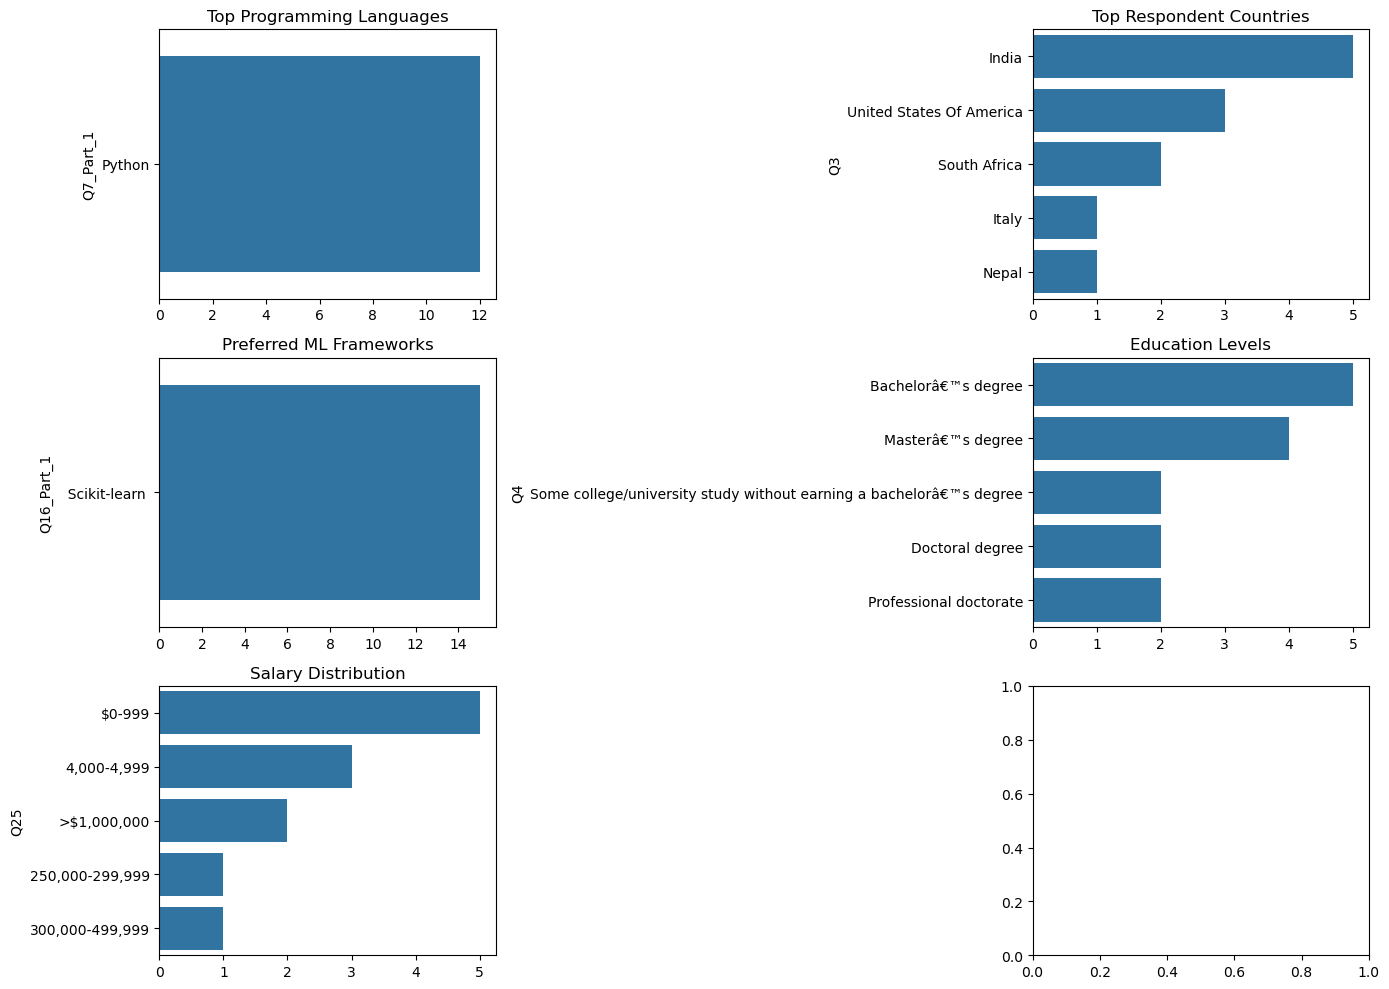

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14,10))
axes = axes.flatten()

sns.barplot(x=top_langs.values, y=top_langs.index, ax=axes[0])
axes[0].set_title("Top Programming Languages")

sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1])
axes[1].set_title("Top Respondent Countries")

sns.barplot(x=top_frameworks.values, y=top_frameworks.index, ax=axes[2])
axes[2].set_title("Preferred ML Frameworks")

sns.barplot(x=edu_dist.values, y=edu_dist.index, ax=axes[3])
axes[3].set_title("Education Levels")

sns.barplot(x=salary_dist.values, y=salary_dist.index, ax=axes[4])
axes[4].set_title("Salary Distribution")

plt.tight_layout()
plt.show()